In [2]:
import pandas as pd
import numpy as np

## Preprocessing Monday Benign Traffic

In [3]:
# loading the same dataset as in previous notebook
cic_df = pd.read_csv(
    "../datasets/raw/CICIDS2017/Monday-WorkingHours.pcap_ISCX.csv"
)


In [4]:
#FIxing column names
cic_df.columns = cic_df.columns.str.strip()

In [5]:
# verifying
print(cic_df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

Before dropping

In [6]:
# checking missing values
cic_df.replace([np.inf, -np.inf], np.nan, inplace=True)
cic_df.isnull().sum().sort_values(ascending=False).head(10)

Flow Bytes/s                   437
Flow Packets/s                 437
Flow Duration                    0
Total Backward Packets           0
Total Length of Fwd Packets      0
Total Length of Bwd Packets      0
Destination Port                 0
Fwd Packet Length Max            0
Fwd Packet Length Min            0
Fwd Packet Length Std            0
dtype: int64

After Dropping

In [7]:
cic_df.dropna(inplace=True)

In [8]:
cic_df.replace([np.inf, -np.inf], np.nan, inplace=True)
cic_df.isnull().sum().sort_values(ascending=False).head(10)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
dtype: int64

In [9]:
cic_df.shape

(529481, 79)

In [10]:
# separating features and labels
X = cic_df.drop("Label", axis=1)
y = cic_df["Label"]

In [11]:
X.shape, y.shape

((529481, 78), (529481,))

In [12]:
#Encoding labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded, le) 

[0 0 0 ... 0 0 0] LabelEncoder()


Feature Scaling, Isolation Forest, SVM and Random Forest need numeric consistency

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(529481, 78)

In [14]:
print(X_scaled)

[[ 1.80340713 -0.36151015 -0.00940617 ... -0.09332319 -0.27018735
  -0.25726278]
 [ 1.80340713 -0.36151026 -0.00940617 ... -0.09332319 -0.27018735
  -0.25726278]
 [ 1.80340713 -0.36151026 -0.00940617 ... -0.09332319 -0.27018735
  -0.25726278]
 ...
 [-0.49474812 -0.36150494 -0.00940617 ... -0.09332319 -0.27018735
  -0.25726278]
 [-0.49474812 -0.3615049  -0.00940617 ... -0.09332319 -0.27018735
  -0.25726278]
 [ 1.95363964 -0.36150967 -0.01052627 ... -0.09332319 -0.27018735
  -0.25726278]]


Saving the preprocessed data
It is necessary for
- reproducibility
- Github cleanliness
- Faster training later

In [15]:
pd.DataFrame(X_scaled).to_csv(
    "../datasets/feature_sets/cicids_monday_benign_isoforest_features_scaled.csv", 
    index=False
)

pd.DataFrame(y_encoded, columns=["Label"]).to_csv(
    "../datasets/feature_sets/cicids_monday_labels_encoded.csv",
    index=False
)

Output:
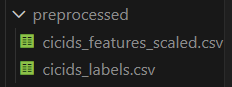

### Resusable Codes for preprocessing files

In [16]:
# Basic Cleansing function
# import numpy as np, already imported

def preprocess_cicids(df):
    df.columns = df.columns.str.strip()
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    return df

# Feature-Label Separation
def split_features_labels(df, label_col="Label"):
    X = df.drop(label_col, axis=1)
    y = df[label_col]
    return X, y

# Label Encoding
from sklearn.preprocessing import LabelEncoder

def encode_labels(y):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    return y_encoded, le

# Feature Scaling
from sklearn.preprocessing import StandardScaler

def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Full Preprocessing function
def full_preprocess_pipeline(df):
    df = preprocess_cicids(df)
    X, y = split_features_labels(df)
    y_encoded, label_encoder = encode_labels(y)
    X_scaled, scaler = scale_features(X)
    return X_scaled, y_encoded, label_encoder, scaler


## Preprocessing tuesday, wednesday and friday 
- tue contains, 
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897

- wed contains,
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11

- fri contains
BENIGN    189067
Bot         1966

In [17]:
df_tue = pd.read_csv("../datasets/raw/CICIDS2017/Tuesday-WorkingHours.pcap_ISCX.csv")
df_wed = pd.read_csv("../datasets/raw/CICIDS2017/Wednesday-WorkingHours.pcap_ISCX.csv")
df_fri = pd.read_csv("../datasets/raw/CICIDS2017/Friday-WorkingHours-Morning.pcap_ISCX.csv")


In [18]:
x_tue, y_tue, le, scaler = full_preprocess_pipeline(df_tue)
print(x_tue, y_tue, le, scaler)

[[-0.44990009 -0.36480999 -0.00554171 ... -0.07554447 -0.26353073
  -0.2535596 ]
 [-0.44990009 -0.36480119 -0.00323578 ... -0.07554447 -0.26353073
  -0.2535596 ]
 [-0.44990009 -0.36479088 -0.00554171 ... -0.07554447 -0.26353073
  -0.2535596 ]
 ...
 [-0.45169379 -0.36482602 -0.01130654 ... -0.07554447 -0.26353073
  -0.2535596 ]
 [ 2.35021766 -0.3648289  -0.01245951 ... -0.07554447 -0.26353073
  -0.2535596 ]
 [-0.45169379 -0.3648248  -0.01130654 ... -0.07554447 -0.26353073
  -0.2535596 ]] [0 0 0 ... 0 0 0] LabelEncoder() StandardScaler()


In [19]:
x_wed, y_wed, le, scaler = full_preprocess_pipeline(df_wed)
x_fri, y_fri, le, scaler = full_preprocess_pipeline(df_fri)

### Saving the preprocessed datasets one by one

In [20]:
pd.DataFrame(x_tue).to_csv(
    "../datasets/preprocessed/cicids_tuesday_features_scaled.csv", 
    index=False
)

pd.DataFrame(y_tue, columns=["Label"]).to_csv(
    "../datasets/preprocessed/cicids_tuesday_labels_encoded.csv",
    index=False
)

In [20]:
pd.DataFrame(x_wed).to_csv(
    "../datasets/preprocessed/cicids_wednesday_features_scaled.csv", 
    index=False
)

pd.DataFrame(y_wed, columns=["Label"]).to_csv(
    "../datasets/preprocessed/cicids_wednesday_labels_encoded.csv",
    index=False
)

In [21]:
pd.DataFrame(x_fri).to_csv(
    "../datasets/preprocessed/cicids_friday_morning_features_scaled.csv", 
    index=False
)

pd.DataFrame(y_fri, columns=["Label"]).to_csv(
    "../datasets/preprocessed/cicids_friday_morning_labels_encoded.csv",
    index=False
)

## Preprocessing remaining attack files, thursday morning/afternoon, friday morning/noon
- Assign the file path to a variable
- pass the variable into the function
- save it as a .csv file

In [21]:
df_thu_morning = pd.read_csv("../datasets/raw/CICIDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df_thu_noon = pd.read_csv("../datasets/raw/CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df_fri_noon1 = pd.read_csv("../datasets/raw/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df_fri_noon2 = pd.read_csv("../datasets/raw/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [22]:
x_thu_morn, y_thu_morn, le, scaler = full_preprocess_pipeline(df_thu_morning)
print(x_thu_morn, y_thu_morn, le, scaler)

[[-4.11237695e-01  3.14944225e+00  2.92506477e-02 ...  2.39059969e+00
   9.58969893e-01  2.48438215e-01]
 [-4.11237695e-01  3.16128109e+00  4.70513743e-02 ...  2.36285137e+00
   9.58969893e-01  2.64622315e-01]
 [-4.32586652e-01  3.36384693e+00  1.20034354e-01 ...  1.39346118e+01
   4.24801312e+00  1.67839206e-01]
 ...
 [-4.31379256e-01 -3.46984840e-01  2.30203934e-02 ... -7.56301457e-02
  -2.85736831e-01 -2.76031807e-01]
 [-4.31379256e-01 -3.90408200e-01 -1.25810600e-02 ... -7.56301457e-02
  -2.85736831e-01 -2.76031807e-01]
 [ 2.86832425e+00 -3.90413114e-01 -1.25810600e-02 ... -7.56301457e-02
  -2.85736831e-01 -2.76031807e-01]] [0 0 0 ... 0 0 0] LabelEncoder() StandardScaler()


In [23]:
x_thu_noon, y_thu_noon, le, scaler = full_preprocess_pipeline(df_thu_noon)
x_fri_noon1, y_fri_noon1, le, scaler = full_preprocess_pipeline(df_fri_noon1)
x_fri_noon2, y_fri_noon2, le, scaler = full_preprocess_pipeline(df_fri_noon2)


In [25]:
pd.DataFrame(x_thu_morn).to_csv("../datasets/preprocessed/cicids_thursday_morning_features_scaled.csv", index = False)
pd.DataFrame(y_thu_morn).to_csv("../datasets/preprocessed/cicids_thursday_morning_labels_encoded.csv", index = False)


In [26]:
pd.DataFrame(x_thu_noon).to_csv("../datasets/preprocessed/cicids_thursday_noon_features_scaled.csv", index = False)
pd.DataFrame(y_thu_noon).to_csv("../datasets/preprocessed/cicids_thursday_noon_labels_encoded.csv", index = False)

In [27]:
pd.DataFrame(x_fri_noon1).to_csv("../datasets/preprocessed/cicids_friday_noon1_features_scaled.csv", index = False)
pd.DataFrame(y_fri_noon1).to_csv("../datasets/preprocessed/cicids_friday_noon1_labels_encoded.csv", index = False)

In [28]:
pd.DataFrame(x_fri_noon2).to_csv("../datasets/preprocessed/cicids_friday_noon2_features_scaled.csv", index = False)
pd.DataFrame(y_fri_noon2).to_csv("../datasets/preprocessed/cicids_friday_noon2_labels_encoded.csv", index = False)

### Combining all the preprocessed files into one single file

In [29]:
# Combining features
X_combined_np = np.concatenate([X_scaled, x_tue, x_wed, x_thu_morn, x_thu_noon, x_fri, x_fri_noon1, x_fri_noon2])

# Combining labels
y_combined_np  = np.concatenate([
    y_encoded, y_tue, y_wed, y_thu_morn,
    y_thu_noon, y_fri, y_fri_noon1, y_fri_noon2
]).ravel()


In [31]:
y_combined_np

array([0, 0, 0, ..., 0, 0, 0], shape=(2827876,))

In [32]:
# Saving the combined file into feature_sets
pd.DataFrame(X_combined_np).to_csv("../datasets/feature_sets/cicids_combined_mixed_features.csv", index = False)

pd.DataFrame(y_combined_np).to_csv("../datasets/feature_sets/cicids_combined_mixed_labels.csv", index = False)